In [156]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
import operator
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('berkhousing.csv')

In [18]:
df = df.dropna()

In [148]:
len(df)

69

In [35]:
x = np.array(df.sqft)
y = np.array(df.price)

In [93]:
def get_distance(a,b):
    return np.sqrt(np.sum(np.square(np.subtract(a, b))))

In [94]:
l = len(x)
dis = [[0 for i in range(l)] for j in range(l)] 

for i in range(l):
    for j in range(l):
        dis[i][j] =  get_distance(x[i],x[j]) 

In [119]:
def nwkernel(x,y,xseq,h):
    y_test = np.zeros(len(x))
    
    l = len(x)
    dis = [[0 for i in range(l)] for j in range(l)] 
    kernel = dis
    
    for i in range(l):
        for j in range(l):
            dis[i][j] =  get_distance(x[i],x[j]) 
        kernel[i] = map(lambda t: norm.pdf(t/float(h)), dis[i])
    
    for a in range(l):
        sum_y = 0
        for b in range(l):
            sum_y += kernel[a][b] / float(sum(kernel[a])) * y[b]
        y_test[a] = sum_y       
    return y_test

In [152]:
def nwk_risk(x,y,h):
    y_test = np.zeros(len(x))
    
    l = len(x)
    dis = [[0 for i in range(l)] for j in range(l)] 
    kernel = dis
    
    for i in range(l):
        for j in range(l):
            dis[i][j] =  get_distance(x[i],x[j]) 
        kernel[i] = map(lambda t: norm.pdf(t/float(h)), dis[i])
    
    for a in range(l):
        sum_y = 0
        for b in range(l):
            sum_y += kernel[a][b] / float(sum(kernel[a])) * y[b]
        y_test[a] = sum_y       
    
    normi = map(np.square, map(operator.sub , y ,y_test ) )
    denormi = map(lambda x : pow(1 - norm.pdf(0) / float(sum(x)) , 2), kernel)
    return sum(map(operator.div,normi,denormi))

In [160]:
risk = []
h_list = []
for h in range(100, 130, 1):
    h_list.append(h)
    risk.append(nwk_risk(x,y,h))

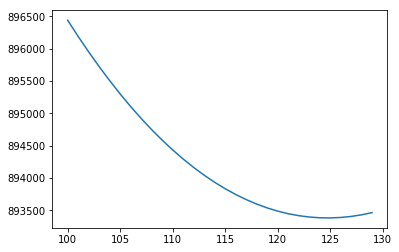

In [163]:
plt.plot(h_list, risk)

In [153]:
risk = nwk_risk(x,y,124.7581)

In [154]:
risk

893382.75955439417